<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Análise de Risco de Crédito direcionada por Modelagem Matemática e Estatística
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este Notebook concentra código fonte da Tese de Bacharelado do curso de Engenharia de Controle e Automação da UNESP Sorocaba desenvolvido pelo aluno Leonardo Aderaldo Vargas.  </i> 
</p>  

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

Amostra baseada na base de dados do Lending Club Loan Data : https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv/data

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Lending Club é uma empresa de empréstimos peer-to-peer com sede nos EUA. Eles combinam pessoas que desejam investir dinheiro com pessoas que desejam pedir dinheiro emprestado. Quando os investidores investem o seu dinheiro através do Lending Club, esse dinheiro é repassado aos mutuários e, quando os mutuários pagam os seus empréstimos, o capital mais os juros são repassados ​​aos investidores. É uma vitória para todos, pois podem obter taxas de empréstimo normalmente mais baixas e retornos mais elevados para os investidores.</i>
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>O conjunto de dados Lending Club contém dados completos de empréstimos para todos os empréstimos emitidos entre 2007-2015, incluindo a situação atual do empréstimo (atual, atrasado, totalmente pago, etc.) e as informações de pagamento mais recentes. Os recursos (também conhecidos como variáveis) incluem pontuação de crédito, número de consultas financeiras, endereço incluindo códigos postais e estado, e cobranças, entre outros. As cobranças indicam se o cliente perdeu um ou mais pagamentos e a equipe está tentando recuperar o dinheiro. O arquivo é uma amostra da base de dados exposta.</i>
</p>  





# <font color='red' style='font-size: 40px;'> Library   </font>
<hr style='border: 2px solid red;'>

In [3]:
# Importação das Bibliotecas e Parâmetros de Otimização
from functions import *
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# Spark Session
# from pyspark.sql import SparkSession, Row 
# #from pyspark.sql.functions import * as F
# import pyspark.sql.functions as F
# spark = SparkSession.builder.getOrCreate()

# <font color='red' style='font-size: 40px;'> 1. Pré-Processamento </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 1.1) Descrição da Base de Dados </font>
<hr style='border: 2px solid green;'>

### Variável Target (VALIDADO)

> 1. loan_status: Situação atual do empréstimo, sendo possível classificar o Cliente em Bom ou Ruim (IMPORTANTE)

### Variável ID (VALIDADO)

> 1. member_id: Id do solicitante (IMPORTANTE)


### Variáveis Referentes ao Produto (VALIDADO)

> 1. term: O número de pagamentos do empréstimo, podendo serem 36 parcelas ou 60 (IMPORTANTE)

> 2. grade: Grau de empréstimo atribuído (IMPORTANTE)

> 3. sub_grade: Subclasse de empréstimo atribuído (IMPORTANTE)

> 4. purpose: Categoria (MCC/CNAE por exemplo) fornecida pelo cliente para pegar o empréstimo (IMPORTANTE)

> 5. loan_amnt: Valor do empréstimo solicitado pelo mutuário; Se em algum momento o departamento de crédito reduzir do empréstimo, isso será refletido nesse valor (IMPORTANTE)

> 6. int_rate: Taxa de juros do empréstimo (IMPORTANTE)

> 7. issue_d: Data em que o empréstimo foi financiado (IMPORTANTE)

> 8. policy_code: Flag que indica Produto disponível publicamente ou não (IMPORTANTE)

> 9. pymnt_plan: Flag que indica se um plano de pagamento foi implementado para o empréstimo (IMPORTANTE)

> 10. initial_list_status: Status de listagem inicial do empréstimo. Os valores possíveis são W-F (IMPORTANTE)

> 11. installment: O pagamento mensal devido pelo mutuário se o empréstimo for originado. (Em termos simples, a originação de um empréstimo é o ponto de partida, onde o mutuário (a pessoa ou entidade que pede o empréstimo) solicita o empréstimo a um credor (a instituição financeira ou pessoa que empresta o dinheiro) e o credor avalia a solicitação, verifica a elegibilidade do mutuário e decide se concederá ou não o empréstimo.) (IMPORTANTE)

 ### Variáveis Referentes ao Cliente (VALIDADO)

 > 1. emp_title: O cargo fornecido pelo cliente ao solicitar o empréstimo (IMPORTANTE)

 > 2. emp_length: Duração do emprego que ele está em anos, sendo que 0 significa menos de 1 ano e 10 significa dez ou mais anos (IMPORTANTE)

 > 3. home_ownership: Flag que indica o Status da propriedade residencial do cliente ao solicitar o empréstimo, podenso ser aluguel, próprio, hipoteca, outros. (IMPORTANTE)

 > 4. verification_status: Flag que indica se a renda foi comprovada, não comprovada (IMPORTANTE)

 > 5. O número de incidências de inadimplência vencidas há mais de 30 dias no arquivo de crédito do mutuário nos últimos 2 anos (IMPORTANTE)

 > 6. annual_inc: Renda anual declarada pelo cliente (IMPORTANTE)

 > 7. addr_state: Estado do Cliente (IMPORTANTE)

 > 8. tot_cur_bal: Limite total considerando todos os produtos de crédito (IMPORTANTE)

 > 9. total_rev_hi_lim: Limite de rotativos total (IMPORTANTE)
 
 > 10. revol_bal: Limite de rotativos utilizado (IMPORTANTE)

 > 11. revol_util: Taxa de utilização de Limite de rotativos [revol_bal/total_rev_hi_lim] (IMPORTANTE)

 > 12. open_acc: Número de produtos de crédito atualmente contratados no histórico do cliente (IMPORTANTE)

 > 13. total_acc: Número total de produtos de crédito contratados no histórico do cliente (IMPORTANTE)

 > 14. pub_rec: Número de registros públicos depreciativos (IMPORTANTE)
 
 > 15. inq_last_6mths: Número de consultas nos últimos 6 meses (excluindo consultas sobre automóveis e hipotecas) (IMPORTANTE)

 > 16. earliest_cr_line: Data em que o primeiro produto de crédito foi contratado pelo cliente (IMPORTANTE)

 > 17. mths_since_last_record: Número de meses desde o último registro público (IMPORTANTE)

 > 18. mths_since_last_major_derog: Meses desde a classificação mais recente de 90 dias ou menos (IMPORTANTE)

 > 19. mths_since_last_delinq: O número de meses desde a última inadimplência do mutuário (IMPORTANTE)


In [3]:
df = pd.read_parquet('data/credit_risk_loan_data.parquet').drop(['id', 'url', 'member_id'], axis = 1)

# <font color='green' style='font-size: 30px;'> 1.2) Definição da Target </font>
<hr style='border: 2px solid green;'>

> 1. A priori, deve-se definir de maneira clara as situações consideradas como Default. Definiu-se um cliente ruim como aquele o qual está em:

- Processo de cobraça ('Charged Off')
- Inadimplente ('Default')
- Atrasado (31 dias ou mais)
- Critérios Mínimos de Aprovação - CMA ('Does not meet the credit policy. Status:Charged Off')
- Possui 1 ou mais contas em inadimplência

> 2. A partir desta definição, deve-se criar a Target mostrando exatamente o que é um cliente Bom ou Ruim 

> 3. Escolheu-se o número "0" para representar o cliente Bom e o número "1" para representar o cliente Ruim, pois o evento de interesse é definir principalmente quem são os Maus Pagadores a fim de evitar ao máximo a inadimplêmcia

> 4. Nota-se que em torno de 88.74% dos clientes são adimplentes, ao passo que 11.26% tornou-se inadimplente

> 5. Esta situação caracteriza um problema de classes desbalanceadas, portanto, isso deve-se ser levado em consideração durante o processo de modelagem e aplicar técnicas para lidar com este tipo de caso

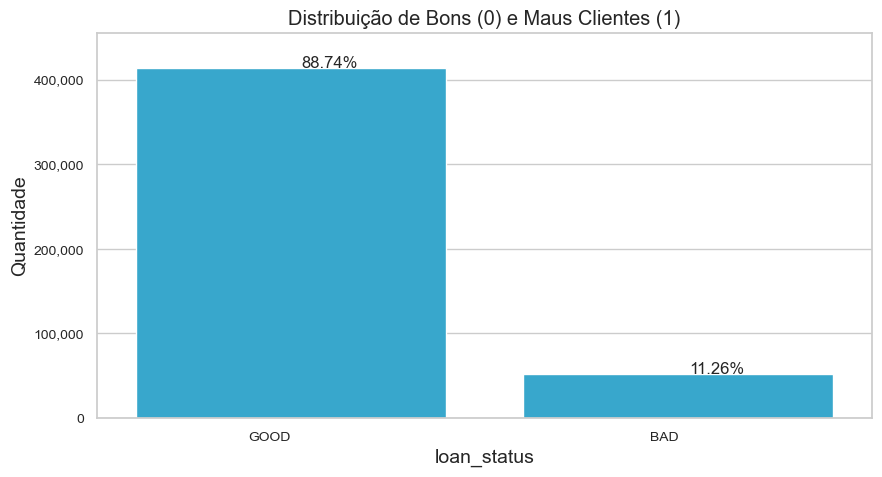

In [4]:
df['loan_status'] = np.where(df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off']) | df['acc_now_delinq'].fillna(0) != 0, 'BAD', 'GOOD') 
plota_barras(['loan_status'], False, df, 1, 1, 'Distribuição de Bons (0) e Maus Clientes (1)', 0)
df['loan_status'] = np.where(df['loan_status'] == 'BAD', 1, 0)

# <font color='green' style='font-size: 30px;'> 1.3) Separação em Treino e Teste </font>
<hr style='border: 2px solid green;'>

> 1. Antes de realizar qualquer análise ou modelagem, deve-se separar em Treino e Teste a fim de simular um ambiente real

> 2. Ao separar antes de qualquer alteração, evita-se um erro muito grave denominado Data leakage

> 3. As análises serão realizadas unicamente sobre a base de Treinamento, simulando um ambiente real no qual a priori a base de Teste seria inexistente 

In [20]:
df_train = separa_treino_teste('loan_status', df, 0.20)[0]
df_test = separa_treino_teste('loan_status', df, 0.20)[1]

print(f'Quantidade de Dados Utilizados para Treinamento: {df_train.shape[0]}')
print(f'Quantidade de Dados Utilizados para Teste: {df_test.shape[0]}')

Quantidade de Dados Utilizados para Treinamento: 373028
Quantidade de Dados Utilizados para Teste: 93257


# <font color='green' style='font-size: 30px;'> 1.4) Variáveis de Entrada </font>
<hr style='border: 2px solid green;'>

> 1. Após a análise de variáveis de Produtos e Clientes, definiu-se quais serão utilizadas como entrada do modelo 

In [21]:
columns_selected = ['loan_status','term','grade','sub_grade','purpose', 'delinq_2yrs', 'loan_amnt','int_rate','issue_d','policy_code','pymnt_plan','initial_list_status','installment','emp_length','home_ownership',
'verification_status','annual_inc','addr_state', 'tot_cur_bal','total_rev_hi_lim','revol_bal','revol_util','open_acc','total_acc','pub_rec','inq_last_6mths','earliest_cr_line','mths_since_last_record', 'mths_since_last_major_derog',
'mths_since_last_delinq']

df_train = df_train[columns_selected]
df_test = df_test[columns_selected]
print(f'Existem {len(columns_selected)} variáveis excluindo as que são referentes a Pagamento ou variáveis totalmente irrelevantes no Dataset')

Existem 30 variáveis excluindo as que são referentes a Pagamento ou variáveis totalmente irrelevantes no Dataset


# <font color='red' style='font-size: 40px;'> 2. Engenharia de Atributos </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 2.1) Anos no emprego atual</font>
<hr style='border: 2px solid green;'>

In [22]:
def numero_de_anos_emprego_atual(df):
    df['emp_length'] = (df['emp_length'].replace({'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8, '9 years':9,'10+ years':10}).fillna(0))
    df['emp_length'] = df['emp_length'].apply(lambda x:int(x))
    df['emp_length'] = np.where(df['emp_length'] <= 3, '3_YEARS', 
                        np.where(df['emp_length'] <= 6, '6_YEARS',
                        np.where(df['emp_length'] <= 9, '9_YEARS',
                        '10_YEARS+')))
    return df['emp_length']

df_train['emp_length'] = numero_de_anos_emprego_atual(df_train)

# <font color='green' style='font-size: 30px;'> 2.2) Número de Registros Negativos</font>
<hr style='border: 2px solid green;'>

In [23]:
def numero_de_registros_negativos(df):

    df = df[['loan_status', 'pub_rec']].copy()
    df[['pub_rec']] = np.where(df[['pub_rec']] == 0, 'sem_registros_negativos', 'com_registros_negativos')

    return df['pub_rec']

df_train['pub_rec'] = numero_de_registros_negativos(df_train)

# <font color='green' style='font-size: 30px;'> 2.3) Consulta de Crédito nos Últimos 6 meses</font>
<hr style='border: 2px solid green;'>

In [24]:
def consulta_de_credito_nos_ultimos_6_meses(df):
    df = df[['loan_status', 'inq_last_6mths']].copy()
    df[['inq_last_6mths']] = np.where(df[['inq_last_6mths']] == 0, 'sem_consultas', 'com_consultas')

    return df['inq_last_6mths']

df_train['inq_last_6mths'] = consulta_de_credito_nos_ultimos_6_meses(df_train)

# <font color='green' style='font-size: 30px;'> 2.4) Comprometimento de Renda</font>
<hr style='border: 2px solid green;'>

In [25]:
def compromento_de_renda(df): 
    df_aux = df[['annual_inc', 'installment', 'loan_amnt', 'term', 'int_rate', 'loan_status']].copy()
    df_aux['term'] = np.where(df_aux['term'] == ' 36 months', 36, 60)
    df_aux['loan_amnt_with_int_rate'] = df_aux['installment']*df_aux['term']
    df_aux['annual_payment'] = np.where(df_aux['term'] == ' 36 months', df_aux['loan_amnt_with_int_rate']/3, df_aux['loan_amnt_with_int_rate']/5)
    df_aux['annual_income_commitment_rate'] = ((df_aux['annual_payment']/df_aux['annual_inc'])*100).round(2)
    
    return df_aux['annual_income_commitment_rate']

df_train['annual_income_commitment_rate'] = compromento_de_renda(df_train)

# <font color='green' style='font-size: 30px;'> 2.5) Número de incidências de inadimplência vencidas há mais de 30 dias no arquivo de crédito do mutuário nos últimos 2 anos</font>
<hr style='border: 2px solid green;'>

In [26]:
def numero_incidencias_inadimplencia_vencidas_30d(df):
    df_aux = df[['loan_status', 'delinq_2yrs']].copy()
    df_aux['delinq_2yrs'] = np.where(df_aux[['delinq_2yrs']] == 0, 'sem_inadimplencia_vencida', 'com_inadimplencia_vencida')

    return df_aux['delinq_2yrs']

df_train['delinq_2yrs'] = numero_incidencias_inadimplencia_vencidas_30d(df_train)

# <font color='green' style='font-size: 30px;'> 2.6) Número de meses desde a contratação do produto de crédito atual</font>
<hr style='border: 2px solid green;'>

In [27]:
def n_meses_produto_credito_atual(df):
    df = df.copy()
    df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
    df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2023-09-20') - df['issue_d'])/np.timedelta64(1, 'M')))
    df['mths_since_issue_d'] = df['mths_since_issue_d'].fillna(df['mths_since_issue_d'].median())
    df['mths_since_issue_d'] = np.where(df['mths_since_issue_d'] < 0, df['mths_since_issue_d'].median(), df['mths_since_issue_d'])
    df['mths_since_issue_d'] = df['mths_since_issue_d'].apply(lambda x:int(x))
    df['issue_d'] = df['mths_since_issue_d']

    return df['issue_d']

df_train['issue_d'] = n_meses_produto_credito_atual(df_train)

# <font color='green' style='font-size: 30px;'> 2.7) Número de meses desde a contratação do primeiro produto de crédito</font>
<hr style='border: 2px solid green;'>

In [28]:
def n_meses_primeiro_produto_credito(df):
    df = df.copy()
    df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
    df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2023-09-20') - df['earliest_cr_line'])/np.timedelta64(1, 'M')))
    df['mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].fillna(df['mths_since_earliest_cr_line'].median())
    df['mths_since_earliest_cr_line'] = np.where(df['mths_since_earliest_cr_line'] < 0, df['mths_since_earliest_cr_line'].median(), df['mths_since_earliest_cr_line'])
    df['mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].apply(lambda x:int(x))
    df['earliest_cr_line'] = df['mths_since_earliest_cr_line']
    
    return df['earliest_cr_line']

df_train['earliest_cr_line'] = n_meses_primeiro_produto_credito(df_train)

# <font color='green' style='font-size: 30px;'> 2.8) Formato das Features Binárias </font>
<hr style='border: 2px solid green;'>

In [29]:
def formato_features_binarias(df):
    df['term'] = np.where(df['term'] == ' 36 months', 0, 1)
    df['delinq_2yrs'] = np.where(df['delinq_2yrs'] == 'sem_inadimplencia_vencida', 0, 1)
    df['initial_list_status'] = np.where(df['initial_list_status'] == 'f', 0, 1)
    df['pymnt_plan'] = np.where(df['pymnt_plan'] == 'n', 0, 1)
    df['verification_status'] = np.where(df['verification_status'] == 'Source Verified', 0, 1)
    df['inq_last_6mths'] = np.where(df['inq_last_6mths'] == 'com_consultas', 0, 1)

    return df

df_train = formato_features_binarias(df_train)

# <font color='green' style='font-size: 30px;'> 2.9) Features Estatísticas</font>
<hr style='border: 2px solid green;'>

In [31]:
def target_encoder_bad_rate(df, tipo):
    categoricas = ['term', 'grade', 'sub_grade', 'purpose', 'policy_code', 'initial_list_status', 'pymnt_plan', 'emp_length', 'home_ownership', 'verification_status', 'addr_state', 'pub_rec', 'inq_last_6mths']
    df_aux_2 = df.copy()
    if tipo == 'Criação':
        for cat in categoricas:
            df_aux = df[[f'{cat}', 'loan_status']].copy()
            good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 0].groupby(f'{cat}', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
            bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 1].groupby(f'{cat}', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
            df_aux = good.merge(bad, on = f'{cat}', how = 'left')
            df_aux['qt_total'] = df_aux['qt_good'] + df_aux['qt_bad']
            df_aux[f'{cat}_enc'] = ((df_aux['qt_bad']/df_aux['qt_total'])*100).round(2)
            df_aux[f'{cat}_enc'] = df_aux[f'{cat}_enc'].apply(lambda x:float(x))
            df_aux = df_aux[[f'{cat}', f'{cat}_enc']].drop_duplicates().sort_values(by = f'{cat}_enc', ascending = True)
            df_aux.to_csv(f'features/{cat}_enc.csv', index = False)
            df_aux_2 = df_aux_2.merge(df_aux[[f'{cat}', f'{cat}_enc']], on = f'{cat}', how = 'left')
            df_aux_2.drop(f'{cat}', axis = 1, inplace = True)
    else:
        for cat in categoricas:
            ft = pd.read_csv(f'features/{cat}_enc.csv')
            replace_dict = dict(zip(ft[f'{cat}'], ft[f'{cat}_enc']))
            df_aux_2[f'{cat}_enc'] = df_aux_2[f'{cat}'].replace(replace_dict)

    return df_aux_2

df_train = target_encoder_bad_rate(df_train, 'Criação')

# <font color='red' style='font-size: 40px;'> 3. Feature Selection </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 3.1) Verificação de Variáveis Nulas ou Irrelevantes </font>
<hr style='border: 2px solid green;'>

> 1. Excluiu-se as variáveis que possuem 100% dos registros nulos

> 2. Excluiu-se também as variáveis que falam a respeito de questões de Pagamento, pois esse fenômeno é após a concessão do crédito e, como um modelo de PD serve para decidir quem pode ou não receber tal concessão, seria errado incluir variáveis de pagamento nas análises ou na modelagem


In [33]:
df_nulls = pd.DataFrame(df_train.isnull().sum()).reset_index().rename({0:'nulls_amnt'}, axis = 1)
df_nulls['nulls_rate'] = df_nulls['nulls_amnt']/df_train.shape[0]
print(f'Existem {len(df_nulls)} variáveis no Dataset')
df_not_nulls_nulls = df_nulls.loc[df_nulls['nulls_rate'] == 0]
columns_not_nulls = list(df_not_nulls_nulls['index'])
print(f'Existem {len(columns_not_nulls)} variáveis sem registros nulos no Dataset')


Existem 31 variáveis no Dataset
Existem 19 variáveis sem registros nulos no Dataset


# <font color='green' style='font-size: 30px;'> 3.2) Aplicações de Imputer </font>
<hr style='border: 2px solid green;'>

> 1. Para realizar o Feature Selection, é importante termos as variáveis categóricas previamente tratadas e sem dados nulos

In [38]:
def simple_imputer(df):

    df_aux = df.copy()
    imputer = SimpleImputer(strategy = 'median')
    imputer.fit(df_aux)

    return imputer

df_aux = df_train.copy()
imputer = simple_imputer(df_aux)
df_aux_imputed = pd.DataFrame(imputer.transform(df_aux), columns = df_aux.columns)

# <font color='green' style='font-size: 30px;'> 3.3) Feature Selection </font>
<hr style='border: 2px solid green;'>

> 1. Aplicou-se um Corte de Variância nas variáveis para eliminar aquelas as quais eram praticamente constantes e não agregam informação útil para discriminar a Target 

> 2. Posteriormente, como temos uma Target qualitativa e Features discretas e contínuas, optou-se pela seleção a partir do cálculo de Informação Mútua 

- A informação mútua é uma medida estatística que quantifica a dependência entre duas variáveis aleatórias, logo, avalia a relevância ou a importância das variáveis de entrada em relação à variável de saída. Ela mede o quanto a informação de uma variável ajuda a prever a outra variável.

> 3. Finalmente, as variáveis restantes foram definidas pela Importância da Feature através de um Random Forest, o qual calcula a importância de cada variável para reduzir a função de custo e mostra quais variáveis são mais importantes para que o modelo acerte corretamente a Target 

> 4. Escolheu-se levar para os testes de Modelagem apenas Features com Feature Importance > 0, ou seja, que possuem ao menos algum tipo de contribuição para o Modelo 



In [53]:
df_aux = df_aux_imputed[remove_features_baixa_variancia('loan_status', df_aux_imputed, 0)]
df_aux = df_aux[remove_features_mutual_information('loan_status', df_aux, 0)[1]]
feature_importances, df_aux = remove_features_feature_importance('loan_status', df_aux, 10, 0)
df_aux.to_csv('features/features_selected.csv', index = False)

# <font color='green' style='font-size: 30px;'> 3.7) Features Selecionadas </font>
<hr style='border: 2px solid green;'>

> 1. 29 Features foram selecionadas para entrarem neste modelo 

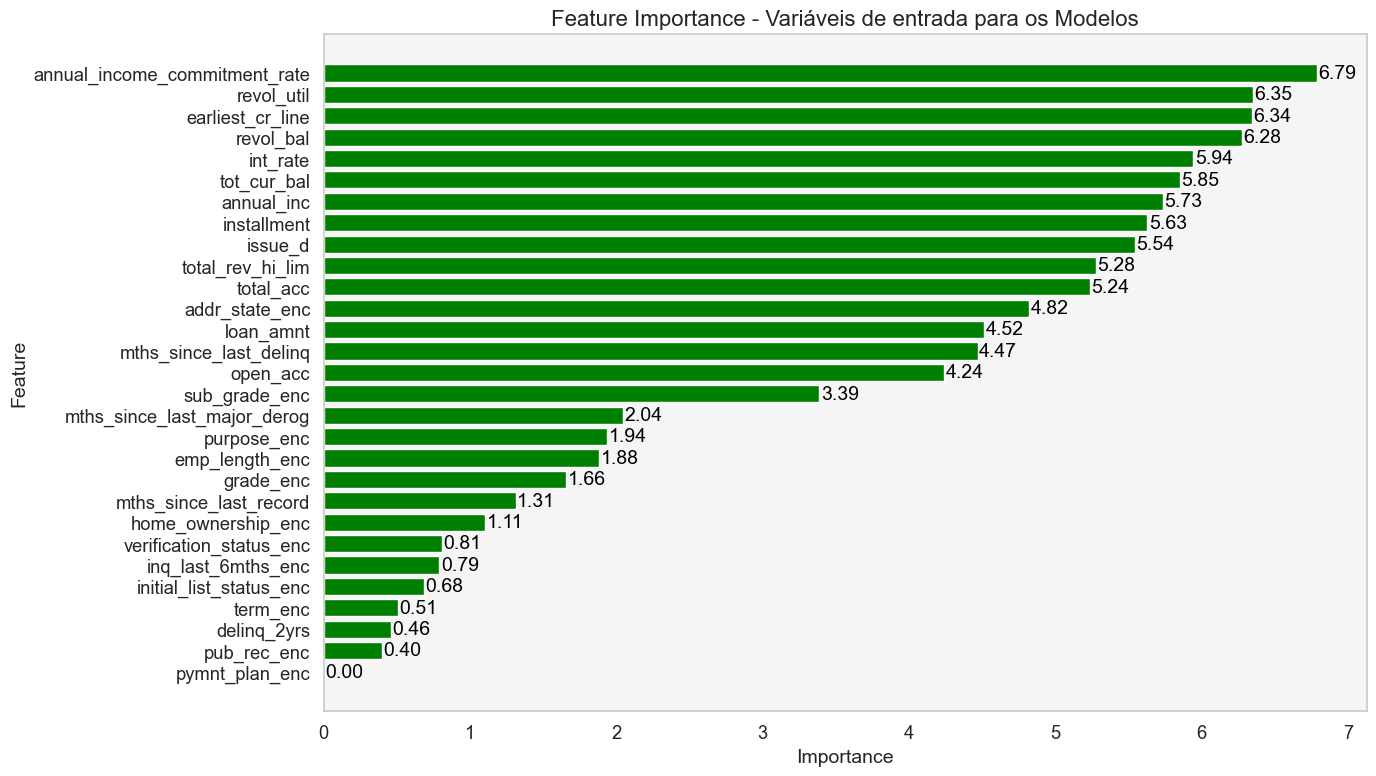

In [72]:
# Carrega os dados
feature_importances = pd.read_csv('features/features_selected.csv')
feature_importances = feature_importances.loc[feature_importances['importance'] > 0] 

# Define o tamanho do gráfico
plt.figure(figsize=(14, 8))

# Define o estilo
sns.set(style="whitegrid", font_scale=1.2)

# Plota o gráfico de barras horizontais
bars = plt.barh(feature_importances['feature'], feature_importances['importance'], color='green')

# Adiciona um título
plt.title("Feature Importance - Variáveis de entrada para os Modelos", fontsize=16)

# Adiciona rótulos aos eixos
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Adiciona a linha ao redor das barras
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left', color='black', fontsize=14)

# Ajusta o layout
plt.tight_layout()

# Remove a grade
plt.grid(False)

# Adiciona cor de fundo
plt.gca().set_facecolor('#F5F5F5')

# Inverte a ordem das features no eixo y para exibir a mais importante no topo
plt.gca().invert_yaxis()

# Mostra o gráfico
plt.show()


# <font color='red' style='font-size: 40px;'> 4. Modelagem Inicial  </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 4.1) Redefindo os Dataframes de Treino e Teste </font>
<hr style='border: 2px solid green;'>


In [25]:
def numero_de_anos_emprego_atual(df):
    df['emp_length'] = (df['emp_length'].replace({'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8, '9 years':9,'10+ years':10}).fillna(0))
    df['emp_length'] = df['emp_length'].apply(lambda x:int(x))
    df['emp_length'] = np.where(df['emp_length'] <= 3, '3_YEARS', 
                        np.where(df['emp_length'] <= 6, '6_YEARS',
                        np.where(df['emp_length'] <= 9, '9_YEARS',
                        '10_YEARS+')))
    return df['emp_length']

def numero_de_registros_negativos(df):

    df = df[['loan_status', 'pub_rec']].copy()
    df[['pub_rec']] = np.where(df[['pub_rec']] == 0, 'sem_registros_negativos', 'com_registros_negativos')

    return df['pub_rec']

def consulta_de_credito_nos_ultimos_6_meses(df):
    df = df[['loan_status', 'inq_last_6mths']].copy()
    df[['inq_last_6mths']] = np.where(df[['inq_last_6mths']] == 0, 'sem_consultas', 'com_consultas')

    return df['inq_last_6mths']

def compromento_de_renda(df): 
    df_aux = df[['annual_inc', 'installment', 'loan_amnt', 'term', 'int_rate', 'loan_status']].copy()
    df_aux['term'] = np.where(df_aux['term'] == ' 36 months', 36, 60)
    df_aux['loan_amnt_with_int_rate'] = df_aux['installment']*df_aux['term']
    df_aux['annual_payment'] = np.where(df_aux['term'] == ' 36 months', df_aux['loan_amnt_with_int_rate']/3, df_aux['loan_amnt_with_int_rate']/5)
    df_aux['annual_income_commitment_rate'] = ((df_aux['annual_payment']/df_aux['annual_inc'])*100).round(2)
    
    return df_aux['annual_income_commitment_rate']

def numero_incidencias_inadimplencia_vencidas_30d(df):
    df_aux = df[['loan_status', 'delinq_2yrs']].copy()
    df_aux['delinq_2yrs'] = np.where(df_aux[['delinq_2yrs']] == 0, 'sem_inadimplencia_vencida', 'com_inadimplencia_vencida')

    return df_aux['delinq_2yrs']

def n_meses_produto_credito_atual(df):
    df = df.copy()
    df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
    df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2023-09-20') - df['issue_d'])/np.timedelta64(1, 'M')))
    df['mths_since_issue_d'] = df['mths_since_issue_d'].fillna(df['mths_since_issue_d'].median())
    df['mths_since_issue_d'] = np.where(df['mths_since_issue_d'] < 0, df['mths_since_issue_d'].median(), df['mths_since_issue_d'])
    df['mths_since_issue_d'] = df['mths_since_issue_d'].apply(lambda x:int(x))
    df['issue_d'] = df['mths_since_issue_d']

    return df['issue_d']

def n_meses_primeiro_produto_credito(df):
    df = df.copy()
    df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
    df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2023-09-20') - df['earliest_cr_line'])/np.timedelta64(1, 'M')))
    df['mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].fillna(df['mths_since_earliest_cr_line'].median())
    df['mths_since_earliest_cr_line'] = np.where(df['mths_since_earliest_cr_line'] < 0, df['mths_since_earliest_cr_line'].median(), df['mths_since_earliest_cr_line'])
    df['mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].apply(lambda x:int(x))
    df['earliest_cr_line'] = df['mths_since_earliest_cr_line']
    
    return df['earliest_cr_line']

def formato_features_binarias(df):
    df['term'] = np.where(df['term'] == ' 36 months', 0, 1)
    df['delinq_2yrs'] = np.where(df['delinq_2yrs'] == 'sem_inadimplencia_vencida', 0, 1)
    df['initial_list_status'] = np.where(df['initial_list_status'] == 'f', 0, 1)
    df['pymnt_plan'] = np.where(df['pymnt_plan'] == 'n', 0, 1)
    df['verification_status'] = np.where(df['verification_status'] == 'Source Verified', 0, 1)
    df['inq_last_6mths'] = np.where(df['inq_last_6mths'] == 'com_consultas', 0, 1)

    return df

def target_encoder_bad_rate(df, tipo):
    categoricas = ['term', 'grade', 'sub_grade', 'purpose', 'policy_code', 'initial_list_status', 'pymnt_plan', 'emp_length', 'home_ownership', 'verification_status', 'addr_state', 'pub_rec', 'inq_last_6mths']
    df_aux_2 = df.copy()
    if tipo == 'Criação':
        for cat in categoricas:
            df_aux = df[[f'{cat}', 'loan_status']].copy()
            good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 0].groupby(f'{cat}', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
            bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 1].groupby(f'{cat}', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
            df_aux = good.merge(bad, on = f'{cat}', how = 'left')
            df_aux['qt_total'] = df_aux['qt_good'] + df_aux['qt_bad']
            df_aux[f'{cat}_enc'] = ((df_aux['qt_bad']/df_aux['qt_total'])*100).round(2)
            df_aux[f'{cat}_enc'] = df_aux[f'{cat}_enc'].apply(lambda x:float(x))
            df_aux = df_aux[[f'{cat}', f'{cat}_enc']].drop_duplicates().sort_values(by = f'{cat}_enc', ascending = True)
            df_aux.to_csv(f'features/{cat}_enc.csv', index = False)
            df_aux_2 = df_aux_2.merge(df_aux[[f'{cat}', f'{cat}_enc']], on = f'{cat}', how = 'left')
            df_aux_2.drop(f'{cat}', axis = 1, inplace = True)
    else:
        for cat in categoricas:
            ft = pd.read_csv(f'features/{cat}_enc.csv')
            replace_dict = dict(zip(ft[f'{cat}'], ft[f'{cat}_enc']))
            df_aux_2[f'{cat}_enc'] = df_aux_2[f'{cat}'].replace(replace_dict)
            df_aux_2.drop(f'{cat}', axis = 1, inplace = True)

    return df_aux_2

In [26]:
df = pd.read_parquet('data/credit_risk_loan_data.parquet').drop(['id', 'url', 'member_id'], axis = 1)
df['loan_status'] = np.where(df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off']) | df['acc_now_delinq'].fillna(0) != 0, 'BAD', 'GOOD') 
df['loan_status'] = np.where(df['loan_status'] == 'BAD', 1, 0)

columns_selected = ['loan_status', 'term','grade','sub_grade','purpose', 'delinq_2yrs', 'loan_amnt','int_rate','issue_d','policy_code','pymnt_plan','initial_list_status','installment','emp_length','home_ownership',
'verification_status','annual_inc','addr_state', 'tot_cur_bal','total_rev_hi_lim','revol_bal','revol_util','open_acc','total_acc','pub_rec','inq_last_6mths','earliest_cr_line','mths_since_last_record', 'mths_since_last_major_derog',
'mths_since_last_delinq']

df = df[columns_selected]

df_train_raw = separa_treino_teste('loan_status', df, 0.20)[0]
df_test_raw = separa_treino_teste('loan_status', df, 0.20)[1] 


df_train_silver = df_train_raw[columns_selected]
df_test_silver= df_test_raw[columns_selected]

In [27]:
df_train_silver['emp_length'] = numero_de_anos_emprego_atual(df_train_silver)
df_train_silver['pub_rec'] = numero_de_registros_negativos(df_train_silver)
df_train_silver['inq_last_6mths'] = consulta_de_credito_nos_ultimos_6_meses(df_train_silver)
df_train_silver['annual_income_commitment_rate'] = compromento_de_renda(df_train_silver)
df_train_silver['delinq_2yrs'] = numero_incidencias_inadimplencia_vencidas_30d(df_train_silver)
df_train_silver['issue_d'] = n_meses_produto_credito_atual(df_train_silver)
df_train_silver['earliest_cr_line'] = n_meses_primeiro_produto_credito(df_train_silver)
df_train_silver = formato_features_binarias(df_train_silver)
df_train_silver = target_encoder_bad_rate(df_train_silver, 'escoragem')
print(df_train_silver.shape)
df_train_silver.head()

(373028, 31)


,loan_status,delinq_2yrs,loan_amnt,int_rate,issue_d,installment,annual_inc,tot_cur_bal,total_rev_hi_lim,revol_bal,revol_util,open_acc,total_acc,earliest_cr_line,mths_since_last_record,mths_since_last_major_derog,mths_since_last_delinq,annual_income_commitment_rate,term_enc,grade_enc,sub_grade_enc,purpose_enc,policy_code_enc,initial_list_status_enc,pymnt_plan_enc,emp_length_enc,home_ownership_enc,verification_status_enc,addr_state_enc,pub_rec_enc,inq_last_6mths_enc
427211,0,0,24000,8.90,115,762.08,77000.00,348253.00,57000.00,30489,53.50,20.00,32.00,442,NaN,NaN,NaN,7.13,10.01,3.96,5.20,11.65,11.26,12.31,11.26,11.76,10.02,10.86,9.35,11.33,13.10
206088,0,1,10000,14.33,134,343.39,112000.00,NaN,NaN,15836,53.10,15.00,38.00,310,NaN,NaN,18.00,2.21,10.01,11.79,10.71,11.65,11.26,12.31,11.26,11.60,10.02,11.44,11.60,11.33,13.10
136020,0,0,20425,8.90,124,648.56,84000.00,385187.00,33300.00,29813,89.50,9.00,20.00,387,NaN,NaN,46.00,5.56,10.01,3.96,5.20,11.65,11.26,12.31,11.26,10.39,10.02,11.44,10.62,11.33,13.10
412305,1,1,17200,16.59,114,609.73,43000.00,22958.00,12500.00,7523,60.20,9.00,13.00,300,NaN,50.00,6.00,10.21,10.01,15.82,14.72,11.65,11.26,12.31,11.26,11.54,12.83,10.86,11.03,11.33,13.10
36159,1,0,8400,12.84,171,282.40,94000.00,NaN,NaN,65621,81.50,14.00,30.00,303,NaN,NaN,NaN,2.16,10.01,11.79,10.96,19.82,11.26,12.31,11.26,11.60,10.02,11.44,11.72,11.33,13.10


In [28]:
df_test_silver['emp_length'] = numero_de_anos_emprego_atual(df_test_silver)
df_test_silver['pub_rec'] = numero_de_registros_negativos(df_test_silver)
df_test_silver['inq_last_6mths'] = consulta_de_credito_nos_ultimos_6_meses(df_test_silver)
df_test_silver['annual_income_commitment_rate'] = compromento_de_renda(df_test_silver)
df_test_silver['delinq_2yrs'] = numero_incidencias_inadimplencia_vencidas_30d(df_test_silver)
df_test_silver['issue_d'] = n_meses_produto_credito_atual(df_test_silver)
df_test_silver['earliest_cr_line'] = n_meses_primeiro_produto_credito(df_test_silver)
df_test_silver = formato_features_binarias(df_test_silver)
df_test_silver = target_encoder_bad_rate(df_test_silver, 'escoragem')

print(df_test_silver.shape)
df_test_silver.head()

(93257, 31)


,loan_status,delinq_2yrs,loan_amnt,int_rate,issue_d,installment,annual_inc,tot_cur_bal,total_rev_hi_lim,revol_bal,revol_util,open_acc,total_acc,earliest_cr_line,mths_since_last_record,mths_since_last_major_derog,mths_since_last_delinq,annual_income_commitment_rate,term_enc,grade_enc,sub_grade_enc,purpose_enc,policy_code_enc,initial_list_status_enc,pymnt_plan_enc,emp_length_enc,home_ownership_enc,verification_status_enc,addr_state_enc,pub_rec_enc,inq_last_6mths_enc
362514,0,0,32500,14.99,111,773.01,65000.00,6563.00,25100.00,1208,4.30,7.00,20.00,258,NaN,NaN,NaN,14.27,14.54,11.79,13.46,10.31,11.26,12.31,11.26,11.76,10.02,11.44,11.72,11.33,9.54
288564,0,1,11000,20.99,108,297.53,60000.00,107972.00,24000.00,13129,54.70,18.00,43.00,242,NaN,NaN,3.00,5.95,14.54,20.03,21.32,8.98,11.26,9.30,11.26,10.39,10.02,11.44,11.17,11.33,9.54
213591,0,0,30000,14.65,136,1034.83,175000.00,NaN,NaN,1906,22.40,9.00,38.00,259,NaN,NaN,41.00,4.26,10.01,11.79,10.96,11.65,11.26,12.31,11.26,11.76,10.02,11.44,11.52,11.33,9.54
263083,0,0,14400,14.49,107,338.74,66000.00,139126.00,17400.00,12944,74.40,12.00,31.00,182,NaN,NaN,NaN,6.16,14.54,11.79,12.29,11.65,11.26,9.30,11.26,11.76,10.02,10.86,11.34,11.33,9.54
165001,0,0,15000,8.90,128,476.30,85000.00,179532.00,8700.00,5902,67.80,7.00,20.00,444,NaN,NaN,39.00,4.03,10.01,3.96,5.20,11.65,11.26,12.31,11.26,10.39,10.02,11.44,11.25,11.33,9.54


In [29]:
features_selected = pd.read_csv('features/features_selected.csv')
features_selected = features_selected.loc[features_selected['importance'] > 0] 
features_selected = list(features_selected['feature'].unique()) + ['loan_status']

df_train = df_train_silver[features_selected]
df_test = df_test_silver[features_selected]

print(f'Quantidade de Dados Utilizados para Treinamento: {df_train.shape[0]}')
print(f'Quantidade de Dados Utilizados para Teste: {df_test.shape[0]}')

Quantidade de Dados Utilizados para Treinamento: 373028
Quantidade de Dados Utilizados para Teste: 93257


In [30]:
x_train = separa_feature_target('loan_status', df_train)[0]
y_train = separa_feature_target('loan_status', df_train)[1]

x_test = separa_feature_target('loan_status', df_test)[0]
y_test = separa_feature_target('loan_status', df_test)[1]

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(373028, 29)
(373028, 1)
(93257, 29)
(93257, 1)


# <font color='green' style='font-size: 30px;'> 4.2) Motor de Modelos </font>
<hr style='border: 2px solid green;'>

> 1. Para a parte de modelagem, escolheu-se três modelos: Regressão Logística, Random Forest e XGBoost 

> 2. A Regressão Logística foi escolhida por ser um modelo estável e muito tradicional, com boa capacidade de interpretababilidade 

> 3. A Random Forest é um ensemble o qual utiliza Bagging, portanto, ela reduz expressivamente a variância e previne problemas como Overfitting. 

> 4. O XGBoost, ao lado do CatBoost, é provavelmente o modelo de Boosting com maior poder preditivo que existe atualmente, permitindo que as previsões sejam muito precisas. 


In [81]:
#Regressão Logística
reg_logistic, y_predict_train_reg_logistic, y_predict_test_reg_logistic,  y_predict_proba_train_reg_logistic, y_predict_proba_test_reg_logistic = Classificador(
                                                                                                                                                    'Regressão Logística', 
                                                                                                                                                    x_train, 
                                                                                                                                                    y_train, 
                                                                                                                                                    x_test, 
                                                                                                                                                    y_test, 
                                                                                                                                                    6)
metricas_reg_logistic = metricas_classificacao('Regressão Logística', y_train, y_predict_train_reg_logistic, y_test, y_predict_test_reg_logistic, y_predict_proba_train_reg_logistic, y_predict_proba_test_reg_logistic)
metricas_validacao_cruzada_reg_logistic, results_validacao_cruzada_reg_logistic = validacao_cruzada_classificacao('Regressão Logística', df, 'loan_status', 5, 6)
print('Rodou Regressão Logística!')
print()

# Naive Bayes
naive_bayes, y_predict_train_naive_bayes, y_predict_test_naive_bayes,  y_predict_proba_train_naive_bayes, y_predict_proba_test_naive_bayes = Classificador(
                                                                                                                                                    'Naive Bayes', 
                                                                                                                                                    x_train, 
                                                                                                                                                    y_train, 
                                                                                                                                                    x_test, 
                                                                                                                                                    y_test, 
                                                                                                                                                    6)
metricas_naive_bayes = metricas_classificacao('Naive Bayes', y_train, y_predict_train_naive_bayes, y_test, y_predict_test_naive_bayes, y_predict_proba_train_naive_bayes, y_predict_proba_test_naive_bayes)
metricas_validacao_cruzada_naive_bayes, results_validacao_cruzada_naive_bayes = validacao_cruzada_classificacao('Naive Bayes', df, 'loan_status', 5, 6)
print('Rodou Naive Bayes!')
print()

# KNN
knn, y_predict_train_knn, y_predict_test_knn,  y_predict_proba_train_knn, y_predict_proba_test_knn = Classificador(
                                                                                                                'KNN Classifier', 
                                                                                                                x_train, 
                                                                                                                y_train, 
                                                                                                                x_test, 
                                                                                                                y_test, 
                                                                                                                6)
metricas_knn = metricas_classificacao('KNN Classifier', y_train, y_predict_train_knn, y_test, y_predict_test_knn, y_predict_proba_train_knn, y_predict_proba_test_knn)
metricas_validacao_cruzada_knn, results_validacao_cruzada_knn = validacao_cruzada_classificacao('KNN Classifier', df, 'loan_status', 3, 6)
print('Rodou KNN Classifier!')
print()

# Random Forest
random_forest, y_predict_train_random_forest, y_predict_test_random_forest, y_predict_proba_train_random_forest, y_predict_proba_test_random_forest = Classificador(
                                                                                                                                                    'Random Forest', 
                                                                                                                                                    x_train, 
                                                                                                                                                    y_train, 
                                                                                                                                                    x_test, 
                                                                                                                                                    y_test, 
                                                                                                                                                    6)
metricas_random_forest = metricas_classificacao('Random Forest', y_train, y_predict_train_random_forest, y_test, y_predict_test_random_forest, y_predict_proba_train_random_forest, y_predict_proba_test_random_forest)
metricas_validacao_cruzada_random_forest, results_validacao_cruzada_random_forest = validacao_cruzada_classificacao('Random Forest', df, 'loan_status', 5, 6)
print('Rodou Random Forest!')
print()

# XGBoost
xgboost, y_predict_train_xgboost, y_predict_test_xgboost, y_predict_proba_train_xgboost, y_predict_proba_test_xgboost = Classificador(
                                                                                                                        'XGBoost', 
                                                                                                                        x_train, 
                                                                                                                        y_train, 
                                                                                                                        x_test, 
                                                                                                                        y_test, 
                                                                                                                        6)
metricas_xgboost = metricas_classificacao('XGBoost', y_train, y_predict_train_xgboost, y_test, y_predict_test_xgboost, y_predict_proba_train_xgboost, y_predict_proba_test_xgboost)
metricas_validacao_cruzada_xgboost, results_validacao_cruzada_xgboost = validacao_cruzada_classificacao('XGBoost', df, 'loan_status', 5, 6)
print('Rodou XGBoost!')
print()

# mlp, y_predict_train_mlp, y_predict_test_mlp,  y_predict_proba_train_mlp, y_predict_proba_test_mlp = Classificador(
#                                                                                                                     'MLP', 
#                                                                                                                     x_train, 
#                                                                                                                     y_train, 
#                                                                                                                     x_test, 
#                                                                                                                     y_test, 
#                                                                                                                     6)
# metricas_mlp = metricas_classificacao('MLP', y_train, y_predict_train_mlpmetricas_mlp, y_test, y_predict_test_mlpmetricas_mlp, y_predict_proba_train_mlpmetricas_mlp, y_predict_proba_test_mlpmetricas_mlp)
# metricas_validacao_cruzada_mlp, results_validacao_cruzada_mlp = validacao_cruzada_classificacao('MLP', df, 'loan_status', 5, 6)    
# print('Rodou Multilayer Perceptron')                                                                                                               

Rodou Regressão Logística!

Rodou Naive Bayes!

Rodou KNN Classifier!

Rodou Random Forest!

Rodou XGBoost!



# <font color='green' style='font-size: 30px;'> 4.3) Métricas </font>
<hr style='border: 2px solid green;'>


> 1. Realizou-se a consolidação das Métricas de Treino, Teste e Validação Cruzada para cada um dos Modelos. 

> 2. As métricas são consistentes e têm bom desempenho em todos os conjuntos, portanto, isso sugere que o modelo está generalizando bem para dados não vistos e ele é estável, provando que não está superajustado (overfitting).

> 3. Para a definição a métrica de maior importância, levou-se em consideração o retorno financeiro estimado de cada classificação em casos de VN, FN, FP, VP

> 4. As métricas mais importantes para este caso são o Recall, AUC e KS. 

- Altos valores de Recall significam menor número de Falsos Negativos (instâncias que seriam inadimplentes mas meu modelo erra afirmando que seriam adimplentes), portanto, estamos evitando conceder crédito a clientes de alto risco e diminuindo a perda de negócios para a instituição financeira.

- A Curva ROC representa a Taxa de Verdadeiros Positivos (Recall: o quão bem meu modelo acerta o verdadeiro mau pagador) vs Taxa de Falsos Positivos (1- Especificidade: o quão bem meu modelo acerta o verdadeiro bom pagador). Sob ela, existe a AUC, a qual reflete o quão bem o modelo classifica os bons e maus pagadores em relação a diversos thresholds, portanto, quanto maior ela for, melhor eu classifico os bons e maus pagadores.

- Altos valores de KS significam que meu modelo consegue separar melhor os clientes bons dos clientes ruins

Métricas Finais


,Acuracia,Precisao,Recall,F1-Score,AUC,KS,Etapa,Classificador
0,0.74,0.20,0.44,0.28,0.68,0.26,treino,Regressão Logística
1,0.74,0.20,0.45,0.28,0.68,0.27,teste,Regressão Logística
2,0.74,0.20,0.43,0.27,0.67,0.25,validacao_cruzada,Regressão Logística
3,0.84,0.24,0.19,0.21,0.66,0.24,treino,Naive Bayes
4,0.84,0.23,0.18,0.21,0.66,0.25,teste,Naive Bayes
5,0.84,0.24,0.19,0.21,0.66,0.24,validacao_cruzada,Naive Bayes
6,0.90,0.69,0.24,0.36,0.91,0.79,treino,KNN Classifier
7,0.86,0.15,0.05,0.07,0.52,0.04,teste,KNN Classifier
8,0.86,0.14,0.05,0.07,0.52,0.04,validacao_cruzada,KNN Classifier
9,0.74,0.21,0.49,0.30,0.70,0.29,treino,Random Forest


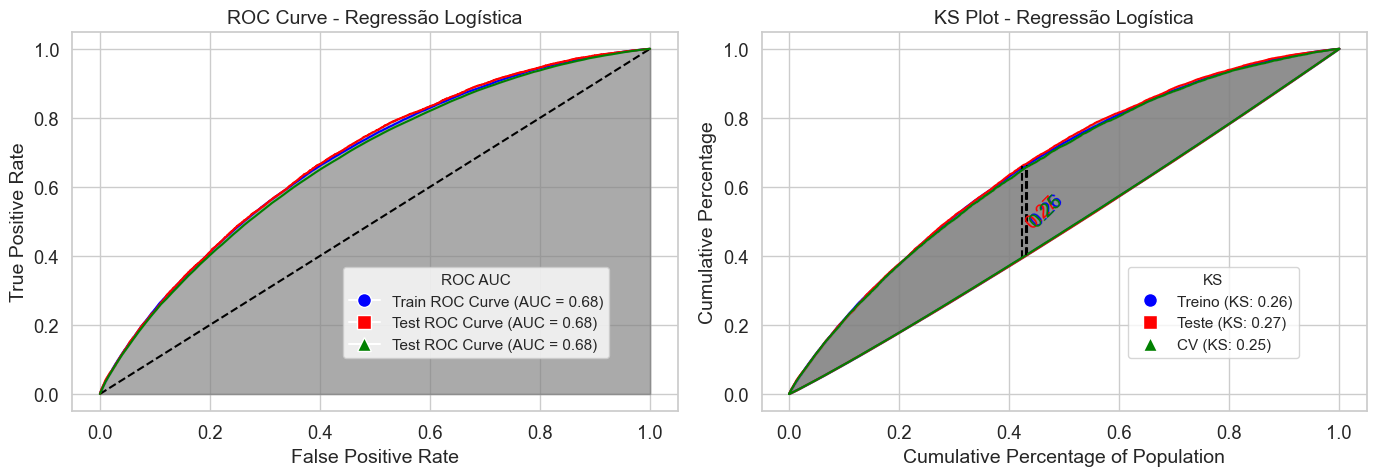

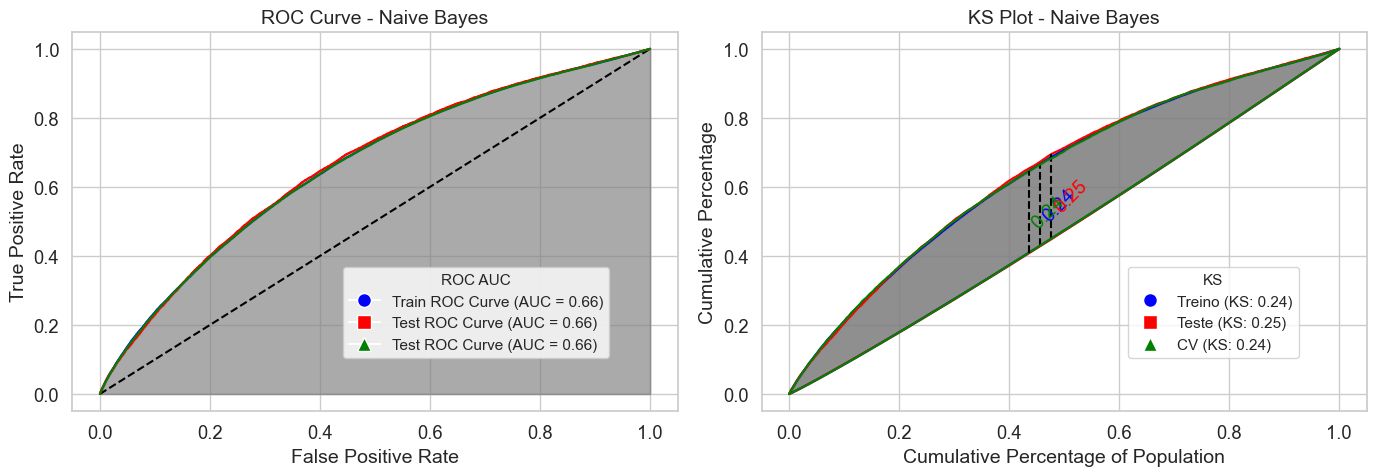

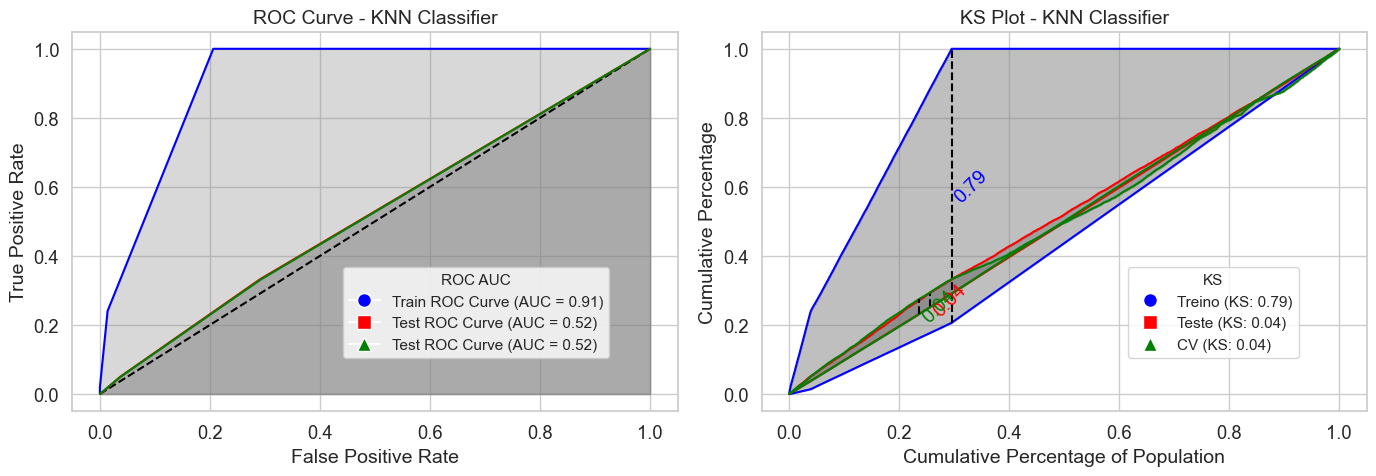

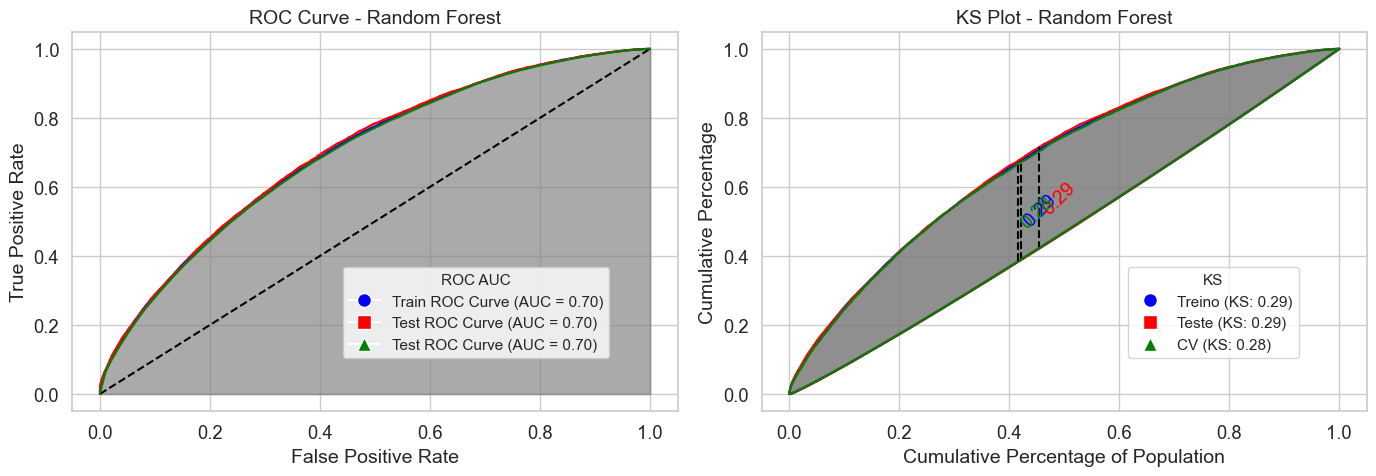

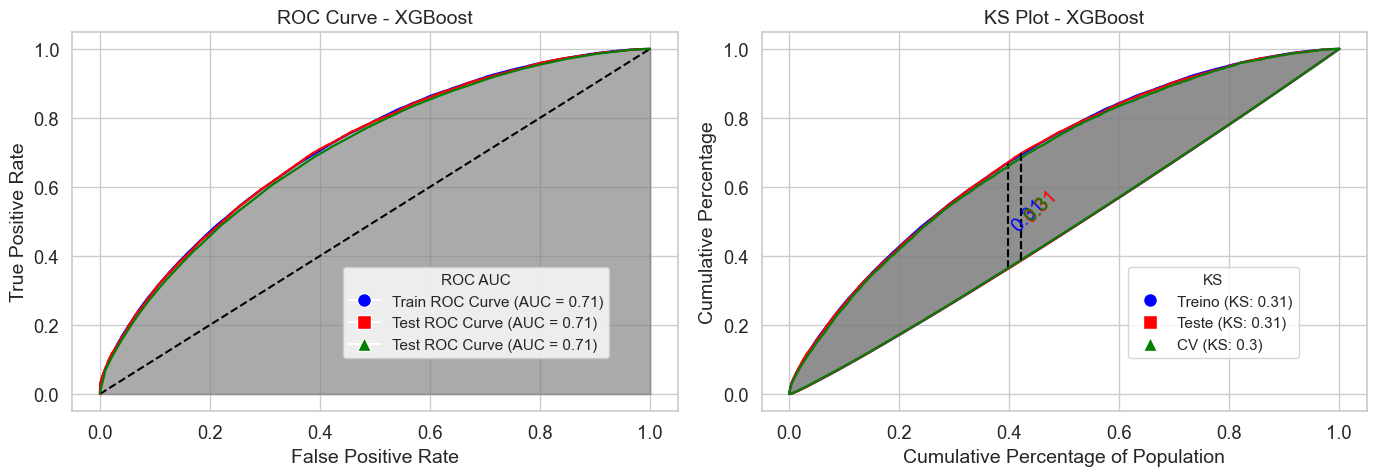

In [83]:
print('Métricas Finais')
metricas_finais = metricas_classificacao_modelos_juntos(
     [
         metricas_reg_logistic, 
         metricas_validacao_cruzada_reg_logistic,
         metricas_naive_bayes,
         metricas_validacao_cruzada_naive_bayes,
         metricas_knn,
         metricas_validacao_cruzada_knn,
         metricas_random_forest,
         metricas_validacao_cruzada_random_forest,
         metricas_xgboost,
         metricas_validacao_cruzada_xgboost,
        #  metricas_mlp,
        #  metricas_validacao_cruzada_mlp
     ]
)
display(metricas_finais)

auc_ks_juntos('Regressão Logística', 'loan_status', y_train, y_predict_train_reg_logistic, y_test, y_predict_test_reg_logistic, y_predict_proba_train_reg_logistic, y_predict_proba_test_reg_logistic, results_validacao_cruzada_reg_logistic)
auc_ks_juntos('Naive Bayes', 'loan_status', y_train, y_predict_train_naive_bayes, y_test, y_predict_test_naive_bayes, y_predict_proba_train_naive_bayes, y_predict_proba_test_naive_bayes, results_validacao_cruzada_naive_bayes)
auc_ks_juntos('KNN Classifier', 'loan_status', y_train, y_predict_train_knn, y_test, y_predict_test_knn, y_predict_proba_train_knn, y_predict_proba_test_knn, results_validacao_cruzada_knn)
auc_ks_juntos('Random Forest', 'loan_status', y_train, y_predict_train_random_forest, y_test, y_predict_test_random_forest, y_predict_proba_train_random_forest, y_predict_proba_test_random_forest, results_validacao_cruzada_random_forest)
auc_ks_juntos('XGBoost', 'loan_status', y_train, y_predict_train_xgboost, y_test, y_predict_test_xgboost, y_predict_proba_train_xgboost, y_predict_proba_test_xgboost, results_validacao_cruzada_xgboost)
#auc_ks_juntos('MLP', 'loan_status', y_train, y_predict_train_mlp, y_test, y_predict_test_mlp, y_predict_proba_train_mlp, y_predict_proba_test_mlp, results_validacao_cruzada_mlp)

# <font color='red' style='font-size: 40px;'> 5. Otimização do Modelo Escolhido </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 5.1) Otimização de Hiperparâmetros </font>
<hr style='border: 2px solid green;'>

> 1. Optou-se por utilizar um Algoritmo de Busca Bayesiana para achar a melhor combinação de hiperparâmetros

> 2. Esse algoritmo aplica probabilidades condicionais para decidir, no fim, a combinação de hiperparâmetros que possui a maior probabilidade de maximizar a métrica desejada

> 3. Após a otimização, notou-se uma melhora expressiva do Recall e do KS, bem como a manutenção da AUC, contando com apenas uma ligeira do Precision.

> 4. Como hiperparâmetros de otimização, escolheu-se os seguintes:

- Logloss: A função de custo utilizada para que o modelo calculasse os erros foi a LogLoss (Função de Perda Logarítmica), a qual quantifica o erro em problemas de classificação binária ou multilabel. Ela é usada para calcular o gradiente e a Hessianiana, que são usados no processo de otimização do modelo por meio do algoritmo de boosting. Portanto, a LogLoss influencia diretamente a construção de cada árvore durante o treinamento do XGBoost. A LogLoss é uma medida que penaliza mais fortemente as previsões que estão longe do valor real, incentivando o modelo a fazer previsões mais precisas em termos de probabilidade. Ela é uma métrica apropriada para problemas de classificação binária e multiclasse.

- Número de Estimadores: O Número de estimador diz respeito à quantidade de árvores treinadas dentro de um modelo de Boosting. O número ideal foi 100, portanto, 100 árvores foram treinadas a fim de corrigir os erros de predição até acharmos o melhor modelo possível.

- Profundidade da Árvore: É o número de profundidade da árvore, ou seja, o número de features que a árvore utiliza para de fato decidir a classificação da instância. O ranking de folhas é criado através do ganho de informação ou medida de impureza

- Learning Rate: É a taxa de aprendizado do modelo, ou seja, decide a contribuição de cada árvore para o modelo multiplicando a contribuição de cada árvore e assim ajustando a magnitude das atualizações feitas em cada passo.

- Regularização L1 (Lasso) e Regularização L2 (Ridge): No XGBoost, os termos "reg_alpha" e "reg_lambda" são utilizados para controlar a regularização L1 e L2. O primeiro penaliza os valores absolutos dos pesos associados aos termos lineares (ou seja, as "folhas") da árvore e incentiva alguns desses pesos a se tornarem exatamente zero, resultando em uma árvore mais esparsa; ao passo que o segundo penaliza os quadrados dos valores dos pesos associados aos termos lineares da árvore e desencoraja fortemente valores grandes dos pesos, promovendo árvores com valores de peso menores. Essas técnicas afetam os valores associados aos splits e folhas da árvore, agindo como penalizações que controlam a complexidade do modelo.

- Gamma: O hiperparâmetro gamma controla a poda da árvore, portanto, valores mais altos impedem que a árvore cresça sem parar. Isso é útil pois tira complexidade do modelo, sendo também um hiperparâmetro de regularização

- Número de Colunas e Amostras: O Colsample-bytree e o subsample servem para definir respectivamente o percentual de colunas e amostras que serão utilizadas na criação das árvores do modelo

- Class Weight: Como o problema trata-se de uma situação de desbalanceamento, o class_weight permite que pesos diferentes sejam atribuidos às classes durante o treinamento, tornando o modelo mais sensível à classe minoritária e ela tenha mais influência no treinamento a fim de melhorar os resultados.


In [317]:
model_otimizado, y_predict_train_otimizado, y_predict_test_otimizado, y_proba_train_otimizado, y_proba_test_otimizado, hiperparametros, t = otimizacao('XGBoost', x_train, y_train, x_test, y_test)
metricas_otimizadas_xgboost = metricas_classificacao('Bayes Search + XGBoost', y_train, y_predict_train_otimizado, y_test, y_predict_test_otimizado, y_proba_train_otimizado, y_proba_test_otimizado)
metricas_validacao_cruzada_otimizada_xgboost, results_validacao_cruzada_otimizada_xgboost = validacao_cruzada_classificacao_otimizada('Bayes Search + XGBoost', df, 'loan_status', 5, t)

Melhores Parâmetros


,colsample_bytree,gamma,learning_rate,max_depth,n_estimators,reg_alpha,reg_lambda,scale_pos_weight,subsample
0,0.72,0.96,0.03,8.00,99.00,0.73,0.58,7.00,0.78


Métricas Finais


,Acuracia,Precisao,Recall,F1-Score,AUC,KS,Etapa,Classificador
0,0.70,0.22,0.64,0.32,0.74,0.35,treino,Bayes Search + XGBoost
1,0.69,0.21,0.61,0.31,0.72,0.32,teste,Bayes Search + XGBoost
2,0.69,0.20,0.60,0.30,0.71,0.30,validacao_cruzada,Bayes Search + XGBoost


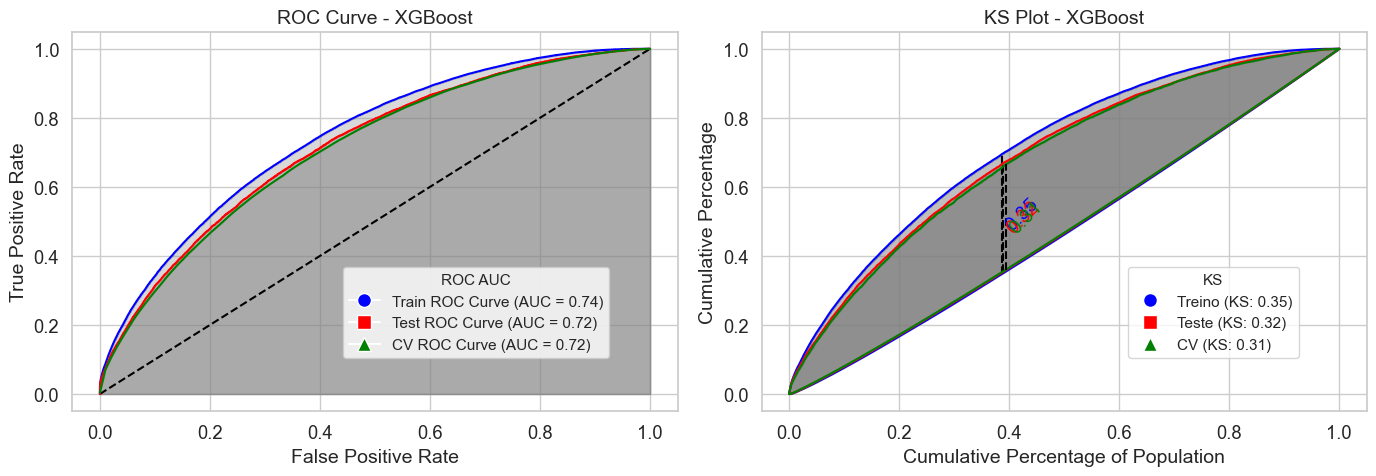

In [319]:
# Métricas Otimizadas
print(f'Melhores Hiperparâmetros')
display(hiperparametros)
print('Métricas Finais')
metricas_finais = metricas_classificacao_modelos_juntos(
     [
         metricas_otimizadas_xgboost,
         metricas_validacao_cruzada_otimizada_xgboost
     ]
)
display(metricas_finais)
auc_ks_juntos('XGBoost', 'loan_status', y_train, y_predict_train_otimizado, y_test, y_predict_test_otimizado, y_proba_train_otimizado, y_proba_test_otimizado, results_validacao_cruzada_otimizada_xgboost)

# <font color='green' style='font-size: 30px;'> 5.2) Otimização do Limiar de Decisão de Probabilidade </font>
<hr style='border: 2px solid green;'>

> 1. Pelo corte de Probabilidade, nota-se que o melhor corte é 0.3, pois ele é o que retorna o melhor lucro possível

> 2. Isso significa que clientes com probabilidade de 0.3 ou maiores já não estão mais eleitos a tomar crédito, pois financeiramente não seria uma decisão viável


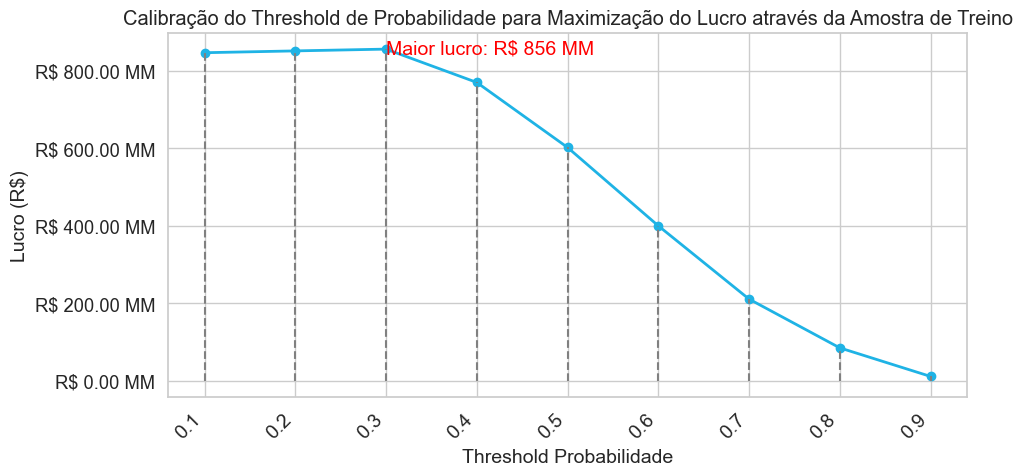

In [32]:
# Função de formatação para converter valores em "R$ VALOR MM"
def formatar_valor_milhoes(valor, pos):
    return f'R$ {valor / 1e6:.2f} MM'

# gerar cortes_probabilidade...
cortes_probabilidade = modelo_corte_probabilidade(df_train, df_train_raw, 'loan_status', x_train, y_train)

# Adiciona valores extras no início e no final do eixo Y
extra_min_y = cortes_probabilidade['lucro'].min() - 50000000  # Ajuste conforme necessário
extra_max_y = cortes_probabilidade['lucro'].max() + 50000000  # Ajuste conforme necessário

# Cria uma lista com os valores do eixo Y, incluindo os extras
yticks = [extra_min_y] + list(cortes_probabilidade['lucro']) + [extra_max_y]

sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 5))  # Define o tamanho do gráfico

# Cria o gráfico usando a função de formatação personalizada
plt.plot(cortes_probabilidade['threshold'], cortes_probabilidade['lucro'], marker='o', color='#1FB3E5', linewidth=2)
for x, y in zip(cortes_probabilidade['threshold'], cortes_probabilidade['lucro']):
    plt.vlines(x, 0, y, colors='gray', linestyles='dashed', alpha=1)

plt.title("Calibração do Threshold de Probabilidade para Maximização do Lucro através da Amostra de Treino")
plt.xlabel('Threshold Probabilidade', fontsize=14)
plt.ylabel('Lucro (R$)', fontsize=14)

plt.xticks(cortes_probabilidade['threshold'], rotation=45, ha='right', fontsize=14)
#plt.yticks(yticks, fontsize = 10)

# Aplica a função de formatação personalizada ao eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valor_milhoes))

# Encontra o índice do maior valor de lucro
indice_maior_lucro = cortes_probabilidade['lucro'].idxmax()

# Formata o valor como "R$ XXX MM"
maior_lucro = cortes_probabilidade['lucro'].max()
valor_formatado = f'R$ {maior_lucro / 1e6:.0f} MM'

# Anotação com o valor do maior lucro
plt.text(
    cortes_probabilidade['threshold'][indice_maior_lucro],
    cortes_probabilidade['lucro'][indice_maior_lucro],
    f'Maior lucro: {valor_formatado}',
    fontsize=14,
    color='red',
    ha='left',
    va='center'
)

plt.locator_params(axis='y', nbins=8)
#plt.ticklabel_format(style='plain', axis='both')
plt.tight_layout()
plt.show()

# <font color='green' style='font-size: 30px;'> 5.3) Cálculo do Retorno Financeiro do Modelo </font>
<hr style='border: 2px solid green;'>

> 1. Pelo corte de Probabilidade, nota-se que o melhor corte é 0.54, pois ele é o que retorna o melhor lucro possível

> 2. Embora os valores de Recall tenham caído um pouco, o acréscimo na precision foi decisiva para aumentar o retorno financeiro


Modelo salvo em models/clf_final.pkl
Modelo carregado de models/clf_final.pkl


,Acuracia,Precisao,Recall,F1-Score,AUC,KS,Etapa,Classificador,Valor Total de Exposição,Retorno Financeiro,Return on Credit Portfolio (ROCP)
0,0.82,0.27,0.34,0.30,0.72,0.31,Amostra Final,Threshold Probability + Bayes Search + XGBoost,R$1.335B,R$188 MM,14.06%


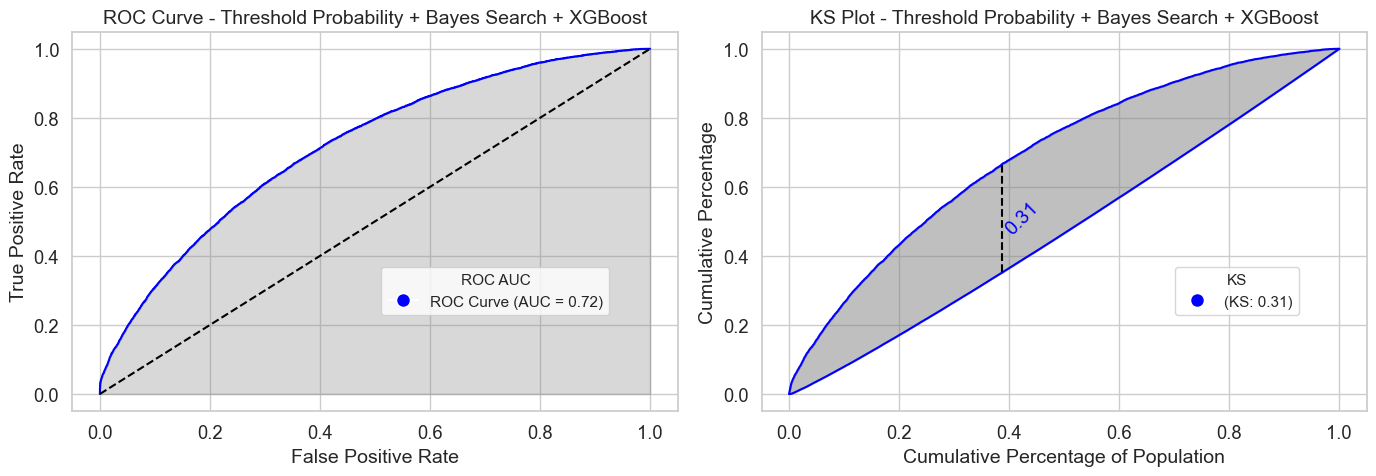

In [323]:
modelo_oficial('Bayes Search + XGBoost', x_train, y_train)
y_predict_test_best_clf, y_predict_proba_test_best_clf = escoragem(x_test, y_test)
display(metricas_classificacao_final('Threshold Probability + Bayes Search + XGBoost', df_test_raw, y_test, y_predict_test_best_clf, y_predict_proba_test_best_clf))
auc_ks_final('Threshold Probability + Bayes Search + XGBoost', 'loan_status', y_test, y_predict_test_best_clf, y_predict_proba_test_best_clf)

# <font color='red' style='font-size: 40px;'> 6. Criação da Política de Crédito para Baseline</font>
<hr style='border: 2px solid red;'>

In [23]:
df = pd.read_parquet('data/credit_risk_loan_data.parquet').drop(['id', 'url', 'member_id'], axis = 1)
df['loan_status'] = np.where(df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off']) | df['acc_now_delinq'].fillna(0) != 0, 'BAD', 'GOOD') 
df['loan_status'] = np.where(df['loan_status'] == 'BAD', 1, 0)

columns_selected = ['loan_status', 'term','grade','sub_grade','purpose', 'delinq_2yrs', 'loan_amnt','int_rate','issue_d','policy_code','pymnt_plan','initial_list_status','installment','emp_length','home_ownership',
'verification_status','annual_inc','addr_state', 'tot_cur_bal','total_rev_hi_lim','revol_bal','revol_util','open_acc','total_acc','pub_rec','inq_last_6mths','earliest_cr_line','mths_since_last_record', 'mths_since_last_major_derog',
'mths_since_last_delinq']

df = df[columns_selected]

df_train_raw = separa_treino_teste('loan_status', df, 0.20)[0]
df_test_raw = separa_treino_teste('loan_status', df, 0.20)[1] 


df_train_silver = df_train_raw[columns_selected]
df_test_silver= df_test_raw[columns_selected]

df_train_silver['emp_length'] = numero_de_anos_emprego_atual(df_train_silver)
df_train_silver['pub_rec'] = numero_de_registros_negativos(df_train_silver)
df_train_silver['inq_last_6mths'] = consulta_de_credito_nos_ultimos_6_meses(df_train_silver)
df_train_silver['annual_income_commitment_rate'] = compromento_de_renda(df_train_silver)
df_train_silver['delinq_2yrs'] = numero_incidencias_inadimplencia_vencidas_30d(df_train_silver)
df_train_silver['issue_d'] = n_meses_produto_credito_atual(df_train_silver)
df_train_silver['earliest_cr_line'] = n_meses_primeiro_produto_credito(df_train_silver)
df_train_silver = formato_features_binarias(df_train_silver)
print(df_train_silver.shape)

df_test_silver['emp_length'] = numero_de_anos_emprego_atual(df_test_silver)
df_test_silver['pub_rec'] = numero_de_registros_negativos(df_test_silver)
df_test_silver['inq_last_6mths'] = consulta_de_credito_nos_ultimos_6_meses(df_test_silver)
df_test_silver['annual_income_commitment_rate'] = compromento_de_renda(df_test_silver)
df_test_silver['delinq_2yrs'] = numero_incidencias_inadimplencia_vencidas_30d(df_test_silver)
df_test_silver['issue_d'] = n_meses_produto_credito_atual(df_test_silver)
df_test_silver['earliest_cr_line'] = n_meses_primeiro_produto_credito(df_test_silver)
df_test_silver = formato_features_binarias(df_test_silver)

print(df_test_silver.shape)

features_selected = pd.read_csv('features/features_selected.csv')
features_selected = features_selected.loc[features_selected['importance'] > 0] 
features_selected = list(features_selected['feature'].unique()) + ['loan_status']
features_selected = [feature.replace('_enc', '') if '_enc' in feature else feature for feature in features_selected]

df_train = df_train_silver[features_selected]
df_test = df_test_silver[features_selected]

print(f'Quantidade de Dados Utilizados para Treinamento: {df_train.shape[0]}')
print(f'Quantidade de Dados Utilizados para Teste: {df_test.shape[0]}')


x_train = separa_feature_target('loan_status', df_train)[0]
y_train = separa_feature_target('loan_status', df_train)[1]

x_test = separa_feature_target('loan_status', df_test)[0]
y_test = separa_feature_target('loan_status', df_test)[1]

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(373028, 31)
(93257, 31)
Quantidade de Dados Utilizados para Treinamento: 373028
Quantidade de Dados Utilizados para Teste: 93257
(373028, 29)
(373028, 1)
(93257, 29)
(93257, 1)


# <font color='green' style='font-size: 30px;'> 6.1) Criando o Cubo</font>
<hr style='border: 2px solid green;'>

> 1. 


In [24]:
df_train

,annual_income_commitment_rate,revol_util,earliest_cr_line,revol_bal,int_rate,tot_cur_bal,annual_inc,installment,issue_d,total_rev_hi_lim,total_acc,addr_state,loan_amnt,mths_since_last_delinq,open_acc,sub_grade,mths_since_last_major_derog,purpose,emp_length,grade,mths_since_last_record,home_ownership,verification_status,inq_last_6mths,initial_list_status,term,delinq_2yrs,pub_rec,pymnt_plan,loan_status
427211,7.13,53.50,442,30489,8.90,348253.00,77000.00,762.08,115,57000.00,32.00,SC,24000,NaN,20.00,A5,NaN,debt_consolidation,3_YEARS,A,NaN,MORTGAGE,0,0,0,0,0,sem_registros_negativos,0,0
206088,2.21,53.10,310,15836,14.33,NaN,112000.00,343.39,134,NaN,38.00,NJ,10000,18.00,15.00,C1,NaN,debt_consolidation,6_YEARS,C,NaN,MORTGAGE,1,0,0,0,1,sem_registros_negativos,0,0
136020,5.56,89.50,387,29813,8.90,385187.00,84000.00,648.56,124,33300.00,20.00,GA,20425,46.00,9.00,A5,NaN,debt_consolidation,10_YEARS+,A,NaN,MORTGAGE,1,0,0,0,0,sem_registros_negativos,0,0
412305,10.21,60.20,300,7523,16.59,22958.00,43000.00,609.73,114,12500.00,13.00,MA,17200,6.00,9.00,D1,50.00,debt_consolidation,9_YEARS,D,NaN,RENT,0,0,0,0,1,sem_registros_negativos,0,1
36159,2.16,81.50,303,65621,12.84,NaN,94000.00,282.40,171,NaN,30.00,CA,8400,NaN,14.00,C2,NaN,educational,6_YEARS,C,NaN,MORTGAGE,1,0,0,0,0,sem_registros_negativos,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,1.60,35.20,340,2886,8.67,106820.00,71000.00,158.24,107,8200.00,19.00,KY,5000,9.00,10.00,B1,49.00,debt_consolidation,3_YEARS,B,79.00,MORTGAGE,1,1,1,0,1,com_registros_negativos,0,0
365838,6.69,37.70,239,12929,12.49,22067.00,72000.00,668.98,112,34300.00,19.00,NY,20000,11.00,15.00,B5,NaN,debt_consolidation,10_YEARS+,B,NaN,RENT,0,0,0,0,1,sem_registros_negativos,0,0
131932,5.91,43.60,229,15775,14.09,15775.00,80000.00,657.06,124,36171.00,12.00,NJ,19200,NaN,7.00,B5,NaN,credit_card,10_YEARS+,B,NaN,RENT,1,1,0,0,0,sem_registros_negativos,0,0
146867,5.31,82.90,321,29909,11.14,278661.00,69000.00,508.48,126,36100.00,37.00,MA,15500,NaN,13.00,B2,NaN,credit_card,10_YEARS+,B,NaN,MORTGAGE,1,1,0,0,0,sem_registros_negativos,0,0


# <font color='red' style='font-size: 40px;'> 7. Comparação e Quantificação dos Resultados</font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 7.1) BAD vs Rating</font>
<hr style='border: 2px solid green;'>

> 1. Pelo gráfico, nota-se que o Modelo foi um sucesso

> 2. Já é esperado que os Ratings mais altos possuem bem menos inadimplentes que Ratings mais baixos


Modelo carregado de models/clf_final.pkl


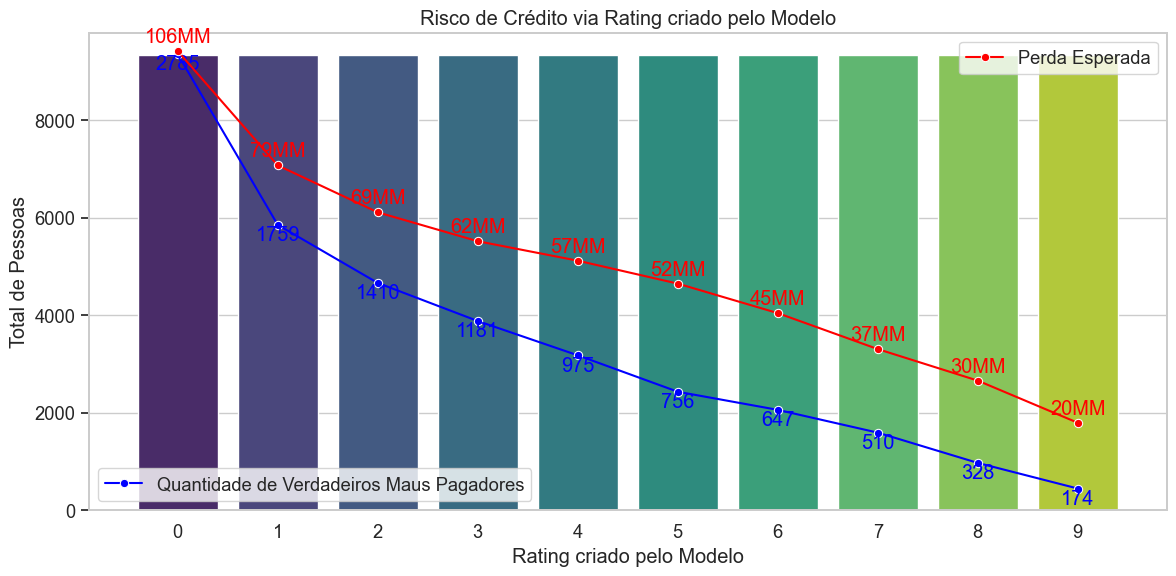

In [64]:
# Função para abreviar números grandes
def abbreviate_number(number):
    abbreviations = [(1e9, 'B'), (1e6, 'MM'), (1e3, 'K')]
    
    for factor, abbreviation in abbreviations:
        if abs(number) >= factor:
            abbreviated = int(round(number / factor))
            return f"{abbreviated}{abbreviation}"

    return str(int(number))

# Escora o Modelo
y_predict_test_best_clf, y_predict_proba_test_best_clf = escoragem(x_test, y_test)

# Criar o DataFrame
df_analytics = df_test_raw.copy()
df_analytics['term'] = np.where(df_analytics['term'] == ' 36 months', 36, 60)
df_analytics['loan_amnt_with_int_rate'] = df_analytics['installment']*df_analytics['term']
df_analytics['y_true'] = y_test['loan_status'].values
df_analytics['y_predict_test_best_clf'] = y_predict_test_best_clf
df_analytics['Probability of Default'] = y_predict_proba_test_best_clf[:, 1]
df_analytics = df_analytics[['loan_amnt', 'loan_amnt_with_int_rate', 'y_true', 'y_predict_test_best_clf', 'Probability of Default']]
df_analytics['deciles'] = transform_to_deciles(df_analytics, 'Probability of Default')
agrupado = df_analytics.groupby('deciles', as_index = False)['y_true'].count().rename({'y_true':'qt_pessoas_decil'}, axis = 1)

# Calcula o Rating
df_analytics = df_analytics.merge(agrupado, on = 'deciles', how = 'left').rename({'deciles':'rating_model'}, axis = 1)
df_analytics['rating_model'] = np.where(df_analytics['rating_model'] == 0, 9, 
               np.where(df_analytics['rating_model'] == 1, 8, 
               np.where(df_analytics['rating_model'] == 2, 7, 
               np.where(df_analytics['rating_model'] == 3, 6, 
               np.where(df_analytics['rating_model'] == 4, 5, 
               np.where(df_analytics['rating_model'] == 5, 4, 
               np.where(df_analytics['rating_model'] == 6, 3, 
               np.where(df_analytics['rating_model'] == 7, 2, 
               np.where(df_analytics['rating_model'] == 8, 1, 0)))))))))

# Calcula o Retorno Financeiro
df_analytics['expected_loss'] = df_analytics['Probability of Default']*df_analytics['loan_amnt']

# ...

# Cria um gráfico de barras agrupado para as probabilidades previstas e a linha para a quantidade de pessoas ruins
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='rating_model', y='qt_pessoas_decil', data=df_analytics, ci=None, palette='viridis', ax=ax1, capsize=0.1)  # Aumenta o espaçamento entre as barras
ax1.set_title('Risco de Crédito via Rating criado pelo Modelo')
ax1.set_xlabel('Rating criado pelo Modelo')
ax1.set_ylabel('Total de Pessoas')

# Cria um segundo eixo y para a linha de quantidade de pessoas ruins
ax2 = ax1.twinx()
sns.lineplot(x='rating_model', y='y_true', data=df_analytics.groupby('rating_model')['y_true'].sum().reset_index(), marker='o', color='blue', ax=ax2, label='Quantidade de Verdadeiros Maus Pagadores')
ax2.get_yaxis().set_visible(False)
for index, row in df_analytics.groupby('rating_model')['y_true'].sum().reset_index().iterrows():
    ax2.text(row['rating_model'], row['y_true']  - 0.04 * ax2.get_ylim()[1], str(int(row['y_true'])), ha='center', va='bottom', color='blue')

# Cria um terceiro eixo y para a linha de lucro esperado
ax3 = ax1.twinx()
sns.lineplot(x='rating_model', y='expected_loss', data=df_analytics.groupby('rating_model')['expected_loss'].sum().reset_index(), marker='o', color='red', ax=ax3, label = 'Perda Esperada')
ax3.get_yaxis().set_visible(False)

# Adiciona labels formatados para os pontos em vermelho
for index, row in df_analytics.groupby('rating_model')['expected_loss'].sum().reset_index().iterrows():
    abbreviated_label = abbreviate_number(row['expected_loss'])
    text_position = row['expected_loss'] + 0.01 * ax3.get_ylim()[1]  # Ajuste de posição vertical
    ax3.text(row['rating_model'], text_position, abbreviated_label, ha='center', va='bottom', color='red')

# Ajuste do limite inferior para garantir que todos os textos sejam visíveis
ax3.set_ylim(bottom=0)

# Adiciona anotação diretamente ao gráfico para a "Perda Esperada"
maior_perda_esperada = df_analytics.groupby('rating_model')['expected_loss'].sum().max()
abbreviated_label = abbreviate_number(maior_perda_esperada)
text_position = maior_perda_esperada + 0.08 * ax3.get_ylim()[1]  # Ajuste de posição vertical
#ax3.text(df_analytics['rating_model'].max(), text_position, f'Perda Esperada: {abbreviated_label}', ha='right', va='bottom', color='red')

# Ajusta legendas
# Adiciona uma única legenda combinada
ax2.legend(loc='lower left')
ax3.legend(loc='upper right')

# Ajusta o layout para evitar sobreposição de rótulos
plt.tight_layout()

plt.show()
